In [1]:
%load_ext autoreload
%autoreload 2

from os.path import join as pjoin

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import train
import predict

In [3]:
data_folder = pjoin("data", "MixedShapesRegularTrain")
train_fname = "MixedShapesRegularTrain_TRAIN.tsv"
test_fname = "MixedShapesRegularTrain_TEST.tsv"

train_path = pjoin(data_folder, train_fname)
test_path = pjoin(data_folder, test_fname)

print(train_path)
print(test_path)

data\MixedShapesRegularTrain\MixedShapesRegularTrain_TRAIN.tsv
data\MixedShapesRegularTrain\MixedShapesRegularTrain_TEST.tsv


In [4]:
SMOOTHING_WINDOW = 1 # 1 for no smoothing
DOWNSAMPLE_WINDOW = 1 # 1 for no downsampling

# KNN Minkowsky

In [5]:
model="knn_minkowski"

params = {
    "smoothing_window": SMOOTHING_WINDOW,
    "downsample_window": DOWNSAMPLE_WINDOW,
    "n_neighbors": 1,
}

cls = train.main(train_path, model, params)

Start training
Saving to file: ckpts\knn_minkowski.pkl
Training duration: 0.10 seconds


Inference duration: 1.64 seconds
              precision    recall  f1-score   support

           1       0.94      0.92      0.93       457
           2       0.95      0.99      0.97       654
           3       0.75      0.87      0.81       418
           4       0.90      0.75      0.81       581
           5       0.94      0.99      0.96       314

    accuracy                           0.90      2424
   macro avg       0.90      0.90      0.90      2424
weighted avg       0.90      0.90      0.90      2424



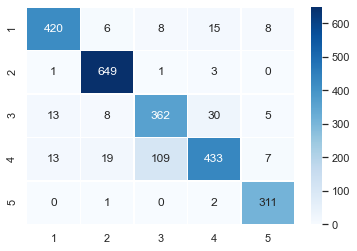

In [6]:
y_pred, cm = predict.main(test_path, model, params)

# KNN DTW

In [7]:
model="knn_dtw"

params = {
    "smoothing_window": SMOOTHING_WINDOW,
    "downsample_window": DOWNSAMPLE_WINDOW,
    "n_neighbors": 1,
    "dwt_window": 60
}

cls = train.main(train_path, model, params)

Start training
Saving to file: ckpts\knn_dtw.pkl
Training duration: 1.48 seconds


Inference duration: 489.57 seconds
              precision    recall  f1-score   support

           1       0.94      0.92      0.93       457
           2       0.95      1.00      0.97       654
           3       0.76      0.88      0.82       418
           4       0.92      0.75      0.82       581
           5       0.93      0.99      0.96       314

    accuracy                           0.90      2424
   macro avg       0.90      0.91      0.90      2424
weighted avg       0.91      0.90      0.90      2424



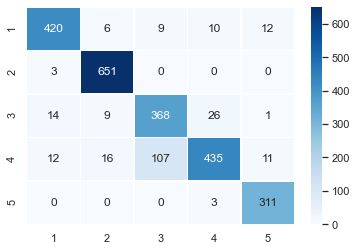

In [8]:
y_pred, cm = predict.main(test_path, model, params)

# Random Forest

In [9]:
model="rf"

params = {
    "smoothing_window": SMOOTHING_WINDOW,
    "downsample_window": DOWNSAMPLE_WINDOW,
    "decomp_level": 1,
    "wavelet": "db2",
    "max_depth": 16,
    "n_estimators": 100,
}


cls = train.main(train_path, model, params)

Start training
Saving to file: ckpts\rf.pkl
Training duration: 0.96 seconds


Inference duration: 0.99 seconds
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       457
           2       0.95      0.94      0.94       654
           3       0.79      0.79      0.79       418
           4       0.82      0.77      0.79       581
           5       0.92      0.98      0.95       314

    accuracy                           0.88      2424
   macro avg       0.87      0.88      0.88      2424
weighted avg       0.87      0.88      0.87      2424



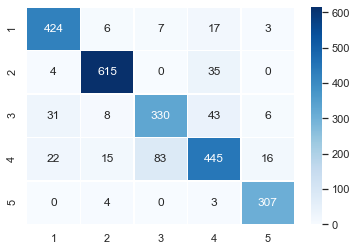

In [10]:
y_pred, cm = predict.main(test_path, model, params)

# LSTM

In [11]:
model="lstm"

params = {
    "smoothing_window": SMOOTHING_WINDOW,
    "downsample_window": DOWNSAMPLE_WINDOW,
    "layer_dim": 3,
    "hidden_dim": 256
}

cls = train.main(train_path, model, params)

#training results are just an overfitting of the train set

Start model training
LSTMClassifier(
  (rnn): LSTM(1024, 256, num_layers=3, batch_first=True)
  (fc_out): Linear(in_features=256, out_features=5, bias=True)
)
Epoch 1 best model saved with f1_score: 52.15%
Epoch 2 best model saved with f1_score: 64.01%
Epoch 3 best model saved with f1_score: 67.02%
Epoch 4 best model saved with f1_score: 67.97%
Epoch 5 best model saved with f1_score: 70.89%
Epoch 6 best model saved with f1_score: 71.55%
Epoch 7 best model saved with f1_score: 75.33%
Epoch 9 best model saved with f1_score: 79.65%
Epoch:  10. Loss: 0.4483. F1 score: 82.88%, Acc.: 83.77%
Epoch 10 best model saved with f1_score: 82.88%
Epoch 11 best model saved with f1_score: 86.80%
Epoch 12 best model saved with f1_score: 87.41%
Epoch 13 best model saved with f1_score: 89.82%
Epoch:  20. Loss: 0.2761. F1 score: 90.18%, Acc.: 90.38%
Epoch 20 best model saved with f1_score: 90.18%
Epoch 24 best model saved with f1_score: 92.13%
Epoch 26 best model saved with f1_score: 92.72%
Epoch:  30. Los

Predicting on test dataset
Inference duration: 0.69 seconds
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       457
           2       0.94      0.97      0.95       654
           3       0.82      0.83      0.83       418
           4       0.88      0.81      0.84       581
           5       0.95      0.99      0.97       314

    accuracy                           0.90      2424
   macro avg       0.90      0.90      0.90      2424
weighted avg       0.90      0.90      0.90      2424



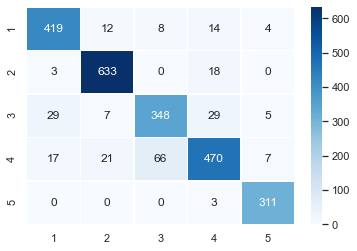

In [12]:
y_pred, cm = predict.main(test_path, model, params)